In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
#@title 1. Objective

#@markdown # **Overview:**
#@markdown - Integrate Probability and Statistics, Linear Regression, and Logistic Regression theories into a cohesive case study that demonstrates their application in predicting an outcome based on a given dataset.

#@markdown # **Goal:**
#@markdown - Goal: Predict [Outcome] using the dataset provided, utilizing Linear and Logistic Regression models to analyze and interpret the results.

In [ ]:
#@title 2. Dataset Preparation

# Loading Dataset
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Finding missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

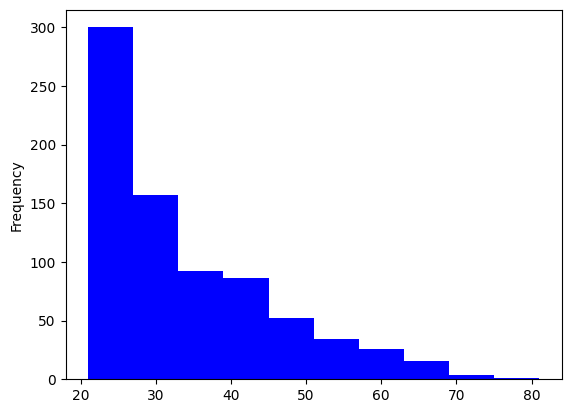

In [ ]:
#@title 3. Exploratory Data Analysis (EDA)

# Age visualization
df.Age.plot(color="blue",kind="hist")
plt.show()

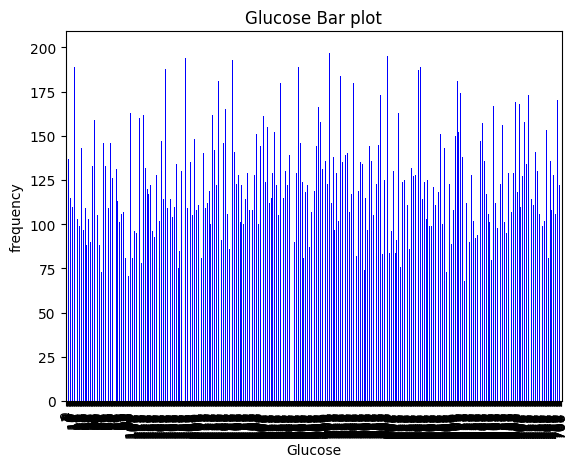

In [ ]:
# Glucose visualization

df.Glucose.plot(color="blue",kind="bar")
plt.xlabel("Glucose")
plt.ylabel("frequency")
plt.title("Glucose Bar plot")
plt.show()

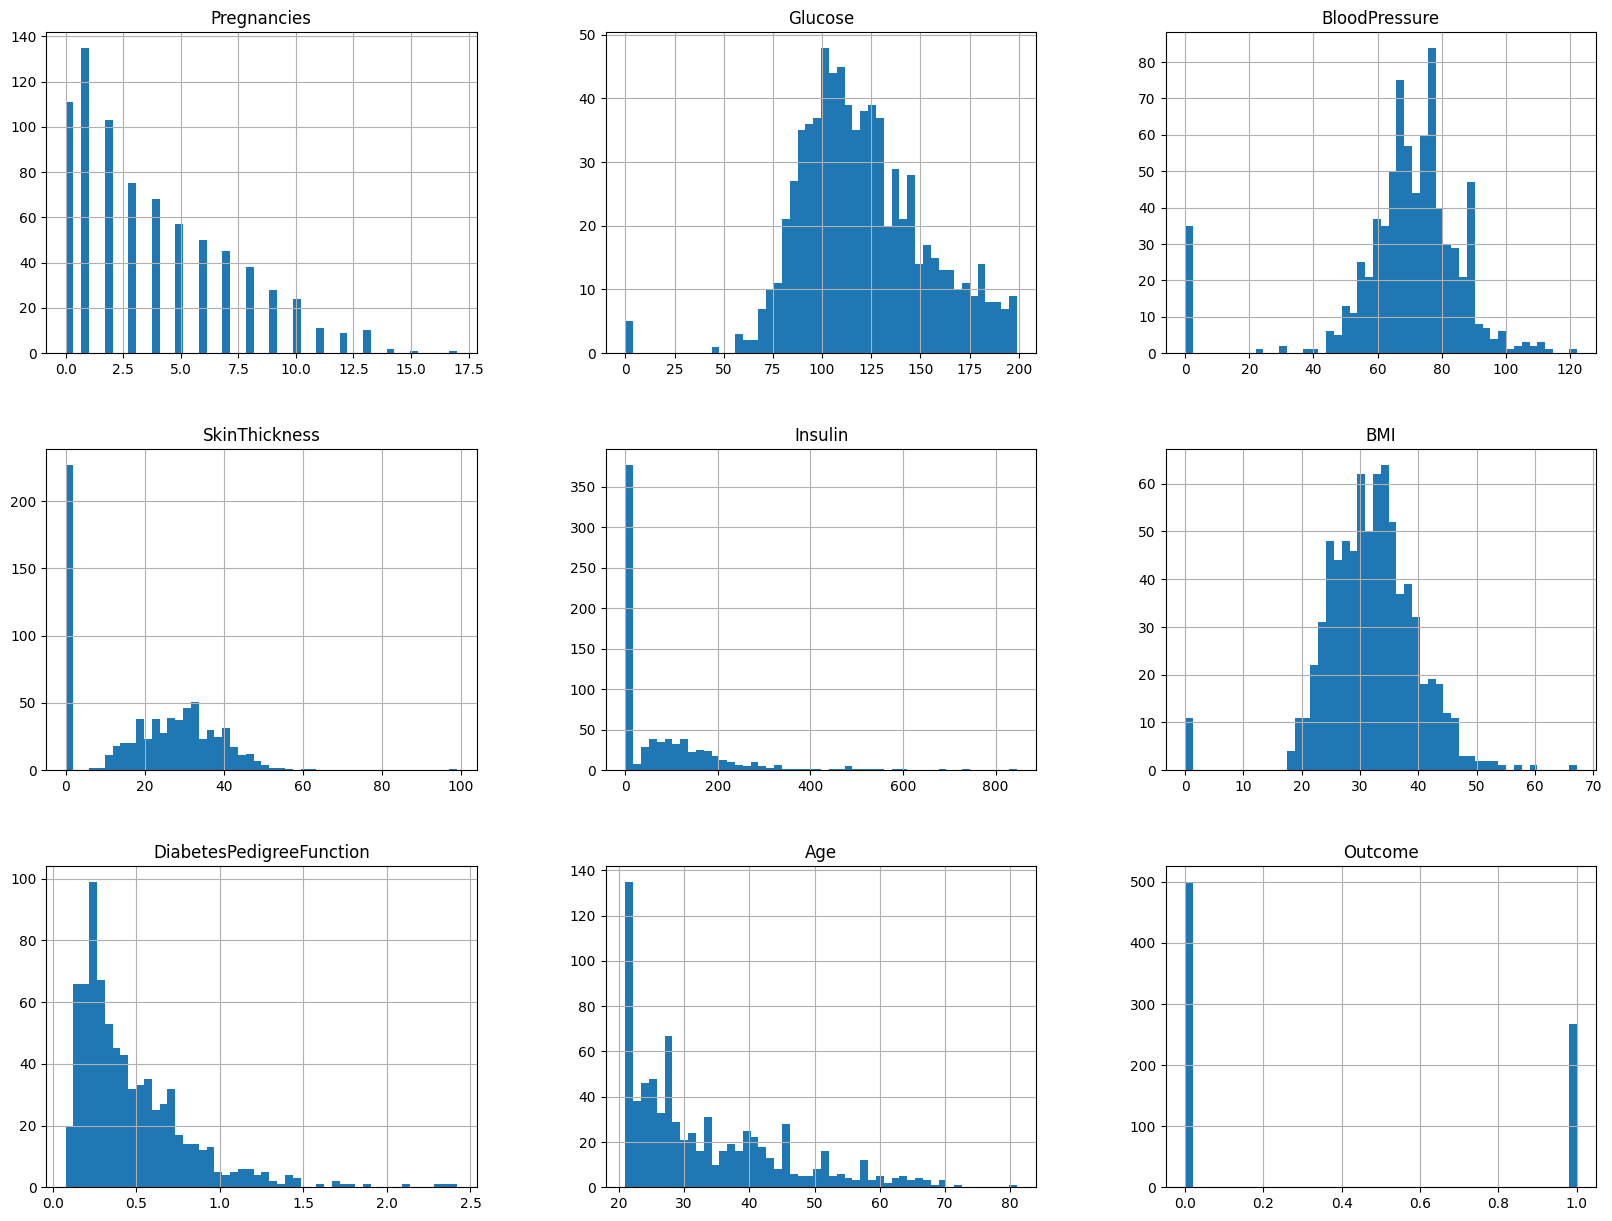

In [ ]:
# Other graphs visualizations

df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
#@title 4. Linear Regression Model

X = df.drop(columns = 'Outcome')
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

# mean squared error
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

# R2 Score
print("R2 Score: ", r2_score(y_test, y_pred))

# Coefficients
print("Coefficients: ", lr.coef_)

# Intercept
print("Intercept: ", lr.intercept_)


Mean Squared Error:  0.18581444283507156
R2 Score:  0.1970161577484406
Coefficients:  [ 0.01940768  0.00636103 -0.00200761 -0.00016178 -0.0002438   0.0136999
  0.14914101  0.00205126]
Intercept:  -0.9212318347852673


In [ ]:
#@title 5. Logistic Regression Model

logr = LogisticRegression(max_iter=1000)
logr.fit(X_train, y_train)

# Coefficients
print("Intercept:", logr.intercept_)
print("Coefficients:", logr.coef_)

Intercept: [-9.00119599]
Coefficients: [[ 1.21150821e-01  3.90999738e-02 -1.28413130e-02 -5.60249949e-04
  -1.53066909e-03  9.45759183e-02  8.94516116e-01  1.25722006e-02]]


In [ ]:
# Predictions
y_pred1 = logr.predict_proba(X_test)[:, 1]
y_pred = logr.predict(X_test)

# Evaluation metrics
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred1))

Accuracy:  0.7402597402597403
Precision:  0.7105263157894737
Recall:  0.48214285714285715
F1 Score:  0.5744680851063829
ROC AUC Score:  0.803206997084548


In [ ]:
# Coefficients Interpretation
coef_logr = pd.DataFrame({'Features': X.columns, 'Coefficients': logr.coef_[0]})
print("\nCoefficients (Logistic Regression):\n", coef_logr)


Coefficients (Logistic Regression):
                    Features  Coefficients
0               Pregnancies      0.121151
1                   Glucose      0.039100
2             BloodPressure     -0.012841
3             SkinThickness     -0.000560
4                   Insulin     -0.001531
5                       BMI      0.094576
6  DiabetesPedigreeFunction      0.894516
7                       Age      0.012572


In [ ]:
#@title 6. Model Comparison and Selection

print('Linear Regression R-squared:', r2_score(y_test, y_pred))
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred))

print("Based on the results the logistic regression outperforms the linear regression")

Linear Regression R-squared: -0.12244897959183687
Logistic Regression Accuracy: 0.7402597402597403
Based on the results the logistic regression outperforms the linear regression


In [ ]:
#@title 7. Conclusion and Insights

#@markdown # **Potential Applications:**
#@markdown - Linear regression and logistic regression are like versatile tools in a toolbox, each with its unique purpose. Linear regression shines when we want to understand the relationship between variables and make predictions based on that understanding. On the other hand, logistic regression steps in when we're dealing with binary outcomes, such as yes/no or true/false scenarios. It's handy for classification tasks, like predicting whether an email is spam or not, based on certain features. Together, these techniques provide a solid foundation for making sense of data and extracting valuable insights in various fields.

#@markdown # **Reflection:**
#@markdown - In conclusion, we use linear regression when the dependent variable is continuous and there's a linear relationship between the independent and dependent variables. Logistic regression, on the flip side, steps in when the dependent variable is binary or categorical, and the connection between the independent variables and the likelihood of the event happening isn't linear.

In [ ]:
#@title 8. References

#@markdown - Diabetes Dataset: [diabetes.csv](https://www.kaggle.com/datasets/shantanudhakadd/diabetes-dataset-for-beginners)
#@markdown - Scikit-learn documentation for Logistic Regression: [Scikit-learn Logistic Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
#@markdown - Scikit-learn documentation for Linear Regression: [Scikit-learn Linear Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
#@markdown - NumPy documentation: [NumPy Documentation](https://numpy.org/doc/)
#@markdown - pandas documentation: [pandas Documentation](https://pandas.pydata.org/docs/)
#@markdown - Matplotlib documentation: [Matplotlib Documentation](https://matplotlib.org/stable/index.html)
#@markdown - Seaborn documentation: [Seaborn Documentation](https://pypi.org/project/seaborn/)
#@markdown - Markdown Guide: [Markdown Guide](https://colab.research.google.com/notebooks/markdown_guide.ipynb)
#@markdown - W3Schools Guide: [W3Schools](https://www.w3schools.com/)